<a href="https://colab.research.google.com/github/lcbjuk/ML/blob/master/Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analise Estatistica**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
notas_turma = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/notas_turma%20-%20final.csv')
notas_turma

,Curso,Alunos,AP1,AP2,AP3,Nota,Conceito
0,ADM,João,9.0,8.0,9.0,8.6,B
1,ADM,Maria,6.0,4.0,10.0,6.0,D
2,DIR,José,4.0,3.0,4.0,3.6,F
3,ADM,Pedro,8.0,10.0,7.0,8.6,B
4,ECO,Paulo,7.5,8.0,9.5,8.1,B
5,DIR,Esther,6.0,4.5,6.0,5.4,D
6,ADM,Gabriel,8.0,6.0,8.0,7.2,B
7,DIR,Rafael,7.5,10.0,9.5,8.9,B
8,ECO,Davi,6.0,10.0,7.0,7.8,B
9,DIR,Silvio,10.0,9.5,9.5,9.7,A


In [0]:
notas_por_conceito = notas_turma['Conceito'].value_counts()
notas_por_conceito

B    7
F    2
D    2
A    1
Name: Conceito, dtype: int64

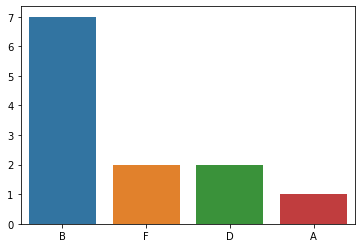

In [0]:
import seaborn as sns
sns.barplot (notas_por_conceito.index , notas_por_conceito.values)

In [0]:
classes = [0,5,7,9,10]
rotulos = ['F','D','B','A']

nts_conc = pd.value_counts( pd.cut ( x = notas_turma['Nota'] , bins = classes , labels = rotulos) )
nts_conc

B    7
D    2
F    2
A    1
Name: Nota, dtype: int64

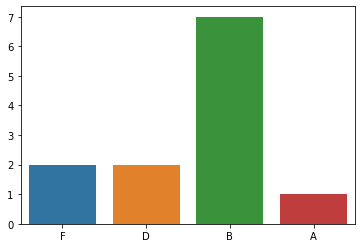

In [0]:
sns.barplot ( nts_conc.index , nts_conc.values )

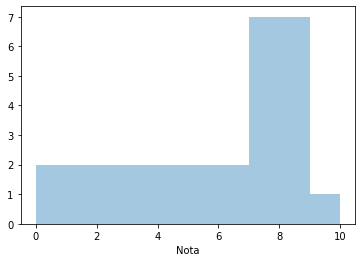

In [0]:
sns.distplot(notas_turma['Nota'] , bins = classes , kde=False)

In [0]:
notas_turma['Nota'].describe()

count    12.000000
mean      7.108333
std       1.925172
min       3.600000
25%       5.850000
50%       7.500000
75%       8.600000
max       9.700000
Name: Nota, dtype: float64

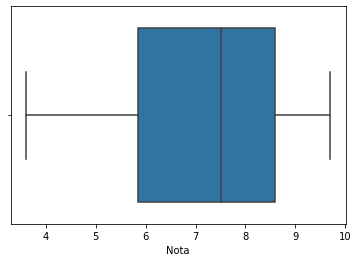

In [0]:
sns.boxplot( x='Nota' , data=notas_turma)

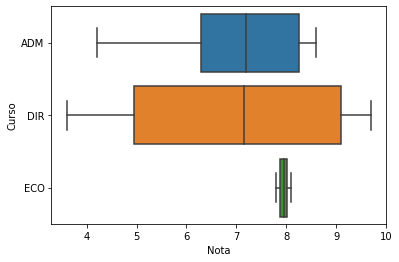

In [0]:
sns.boxplot( x='Nota' , y ='Curso' , data=notas_turma)

**[Exericicos] Analise Estatistica**

In [23]:
natacao = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/altura%20-%20masc.csv')
print(natacao['altura_masc'].min(),natacao['altura_masc'].max())

145 189


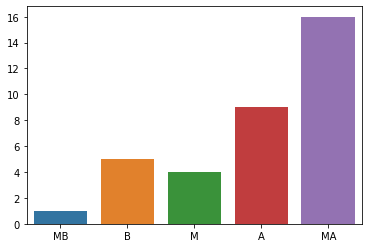

In [0]:
classes = [145,150,160,165,175,190]
rotulos = ['MB','B','M','A','MA']
cat_alturas = pd.value_counts( pd.cut ( x = natacao['altura_masc'] , bins = classes , labels = rotulos) )

sns.barplot(cat_alturas.index , cat_alturas.values)

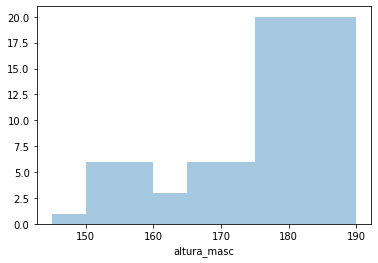

In [0]:
sns.distplot(natacao['altura_masc'] , bins= classes , kde=False)

**Regressao Linear**

In [24]:
nts = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/notas%20-%20ok.csv')
nts

,AP1,AP2,AP3,Final
0,10.0,10.0,9.0,9.80
1,9.0,10.0,9.0,9.40
2,9.5,10.0,10.0,9.80
3,9.4,9.9,9.9,9.70
4,9.3,9.8,9.8,9.60
5,9.2,9.7,9.7,9.50
6,9.1,9.6,9.6,9.40
7,9.0,9.5,9.5,9.30
8,10.0,7.0,5.0,7.80
9,9.0,6.0,4.0,6.80


In [0]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(nts[['AP1','AP2']] , nts['AP3'])
print(reglin.coef_, reglin.intercept_)

[-0.36608176  1.38338992] -0.8257714929014783


In [0]:
def prever_ap3(ap1, ap2):
  ap3 = ap1 * -0.366 + ap2 * 1.383 - 0.825
  return ap3

In [0]:
print(prever_ap3(8,8))
print(prever_ap3(2,4))
print(prever_ap3(3.5,8))

7.310999999999999
3.9749999999999996
8.958


In [0]:
ap1_ap2_futuras = pd.DataFrame({
    'AP1':[8,2,3.5],
    'AP2':[8,4,8]
})
ap3_futuras = reglin.predict(ap1_ap2_futuras)
ap3_futuras

array([7.31269382, 3.97562468, 8.96006172])

In [0]:
r2 = reglin.score(nts[['AP1','AP2']] , nts['AP3'])
r2

0.9818896713333346

In [0]:
ap3_prev = reglin.predict(nts[['AP1','AP2']])

from sklearn import metrics
rr = metrics.r2_score(nts['AP3'] , ap3_prev)
rr

0.9818896713333346

In [0]:
err_quad = metrics.mean_squared_error(nts['AP3'] , ap3_prev) 
err_quad

0.14550924670519017

In [0]:
import numpy as np
err = np.sqrt(err_quad)
err

0.38145674290172166

In [0]:
import statsmodels.api as sm

nts[['AP1','AP2']]

In [0]:
ap1_ap2 = sm.add_constant(nts[['AP1','AP2']])
ap1_ap2

In [0]:
rl = sm.OLS(nts['AP3'] , ap1_ap2).fit()
rl.summary()

In [0]:
sns.lmplot('AP2' , 'AP3' , data=nts)

In [0]:
nts.corr()

,AP1,AP2,AP3,Final
AP1,1.000000,0.278632,0.003717,0.630113
AP2,0.278632,1.000000,0.952691,0.920175
AP3,0.003717,0.952691,1.000000,0.776387
Final,0.630113,0.920175,0.776387,1.000000


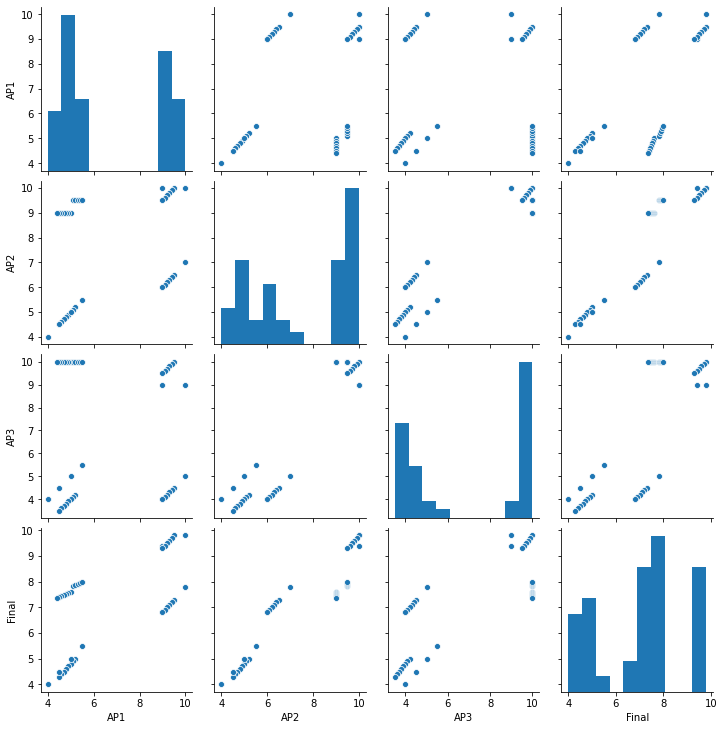

In [0]:
sns.pairplot(nts)

**[Exercicios] Regressao Linear**

In [26]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/usd_ibov_20%20-%2020.csv')
dados.head()

,Date,usd,bov
0,1/2/2020,4.0249,118.57310
1,1/3/2020,4.0668,117.70666
2,1/6/2020,4.0619,116.87792
3,1/7/2020,4.0677,116.66194
4,1/8/2020,4.0644,116.24703


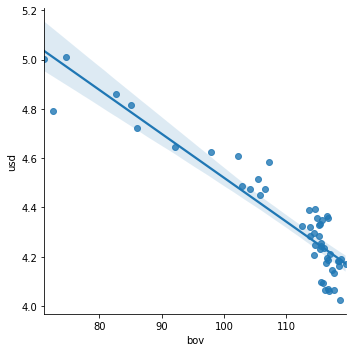

In [0]:
 
import seaborn as sns
sns.lmplot('bov','usd',data=dados)

In [0]:
from sklearn.linear_model import LinearRegression

rl = LinearRegression()

rl.fit(dados[['bov']] , dados['usd'])
print(rl.coef_,rl.intercept_) 

[-0.01783154] 6.303900300544503


In [0]:
ibov_fut = pd.DataFrame({'ibov':[110,100,90,80,70,60]})
rl.predict(ibov_fut)

array([4.34243043, 4.52074588, 4.69906132, 4.87737676, 5.0556922 ,
       5.23400765])